# About Dataset

With growing demands and cut-throat competitions in the market, a Superstore Giant is seeking your knowledge in understanding what works best for them. They would like to understand which products, regions, categories and customer segments they should target or avoid.

You can even take this a step further and try and build a Regression model to predict Sales or Profit.

Go crazy with the dataset, but also make sure to provide some business insights to improve.

# I tried dana analysis to make marketing strategy, which includes
 1. Area analysis
 2. Customer analysis
 3. Product category analysis
 4. Sales and profit time series

# Import Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Import Dataset

In [3]:
df=pd.read_csv('sale.csv',encoding='latin_1')
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,1/21/2014,1/23/2014,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9990,9991,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9991,9992,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
9992,9993,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200


# Basic Info About Dataset

In [4]:
#to see fisrt 5 row
df.head(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [5]:
#to see last 5 rows
df.tail(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
9989,9990,CA-2014-110422,1/21/2014,1/23/2014,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.248,3,0.2,4.1028
9990,9991,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.960,2,0.0,15.6332
9991,9992,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.576,2,0.2,19.3932
9992,9993,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.600,4,0.0,13.3200
9993,9994,CA-2017-119914,5/4/2017,5/9/2017,Second Class,CC-12220,Chris Cortes,Consumer,United States,Westminster,...,92683,West,OFF-AP-10002684,Office Supplies,Appliances,"Acco 7-Outlet Masterpiece Power Center, Wihtou...",243.160,2,0.0,72.9480


In [6]:
#to see randomly 5 rows
df.sample(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
1496,1497,CA-2017-152485,9/4/2017,9/8/2017,Standard Class,JD-15790,John Dryer,Consumer,United States,Coppell,...,75019,Central,OFF-ST-10004950,Office Supplies,Storage,Acco Perma 3000 Stacking Storage Drawers,16.784,1,0.2,-0.2098
7447,7448,CA-2017-127474,2/3/2017,2/7/2017,Second Class,RD-19810,Ross DeVincentis,Home Office,United States,Chicago,...,60610,Central,OFF-PA-10000418,Office Supplies,Paper,Xerox 189,419.400,5,0.2,146.7900
2382,2383,US-2017-117534,3/25/2017,3/26/2017,First Class,CV-12295,Christina VanderZanden,Consumer,United States,Fresno,...,93727,West,OFF-AP-10002403,Office Supplies,Appliances,Acco Smartsocket Color-Coded Six-Outlet AC Ada...,176.040,4,0.0,45.7704
9978,9979,US-2016-103674,12/6/2016,12/10/2016,Standard Class,AP-10720,Anne Pryor,Home Office,United States,Los Angeles,...,90032,West,OFF-BI-10003727,Office Supplies,Binders,Avery Durable Slant Ring Binders With Label Ho...,13.376,4,0.2,4.6816
8021,8022,CA-2014-129189,7/21/2014,7/25/2014,Standard Class,HM-14860,Harry Marie,Corporate,United States,Dallas,...,75217,Central,OFF-AP-10000124,Office Supplies,Appliances,Acco 6 Outlet Guardian Basic Surge Suppressor,4.992,3,0.8,-12.9792


In [8]:
# To see data shape
df.shape

(9994, 21)

In [9]:
# to see columns name
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [10]:
# to see datatypes
df.dtypes

Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code        int64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
Quantity           int64
Discount         float64
Profit           float64
dtype: object

In [11]:
# to see basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [12]:
# to see basic descriptive statistics
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [13]:
# copy of dataframe
df1 = df.copy()

# Data Cleaning & Preprocessing

In [15]:
# to check duplicated value
df.duplicated().sum()

0

Great! Data has no duplicated

In [16]:
# to check null value
df.isna().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

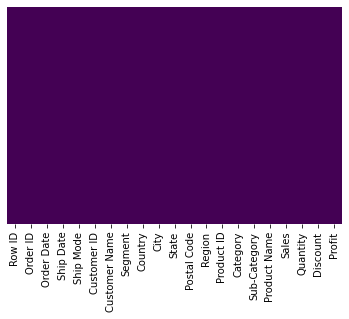

In [22]:
# missung value heatmap
sns.heatmap(df.isna(),cmap='viridis',cbar=False,yticklabels=False);

Great! Data set has no null values.

In [24]:
df.head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820


In [25]:
#delete unwanted columns
df.drop(['Row ID','Order ID'],axis=1,inplace=True)

In [26]:
df.head(2)

,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
1,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820


In [27]:
#check datatypes
df.dtypes

Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code        int64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
Quantity           int64
Discount         float64
Profit           float64
dtype: object

In [28]:
#change datatype
df['Order Date']=pd.to_datetime(df['Order Date'])
df['Ship Date']=pd.to_datetime(df['Ship Date'])

Great! data Set is clean.

# Exploratory Data Analysis

# Which City do they have sales?

In [38]:
city_sale=df.groupby('City')['Sales'].sum().sort_values(ascending=False)[:10]
city_sale


City
New York City    256368.1610
Los Angeles      175851.3410
Seattle          119540.7420
San Francisco    112669.0920
Philadelphia     109077.0130
Houston           64504.7604
Chicago           48539.5410
San Diego         47521.0290
Jacksonville      44713.1830
Springfield       43054.3420
Name: Sales, dtype: float64

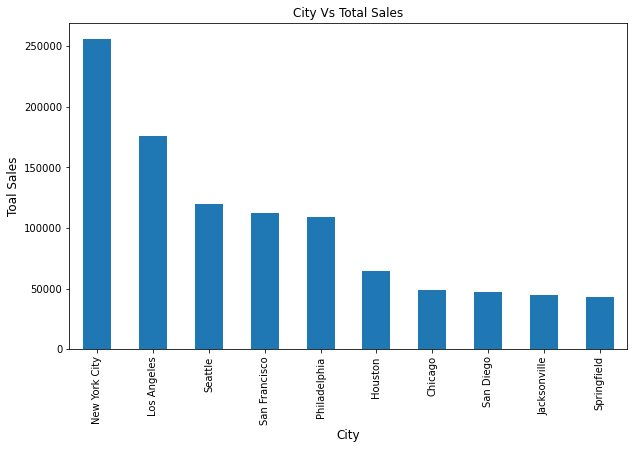

In [45]:
# plot barplot
plt.figure(figsize=(10,6))
city_sale.plot(kind='bar')
plt.title("City Vs Total Sales",fontsize=12)
plt.xlabel('City',fontsize=12)
plt.ylabel("Toal Sales",fontsize=12);

Observe: Most sales in New york city.

# Which Top 10 states by sales?

In [46]:
df.head(2)

,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
1,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820


In [48]:
state_sale=df.groupby('State')['Sales'].sum().sort_values(ascending=False)[:10]
state_sale

State
California      457687.6315
New York        310876.2710
Texas           170188.0458
Washington      138641.2700
Pennsylvania    116511.9140
Florida          89473.7080
Illinois         80166.1010
Ohio             78258.1360
Michigan         76269.6140
Virginia         70636.7200
Name: Sales, dtype: float64

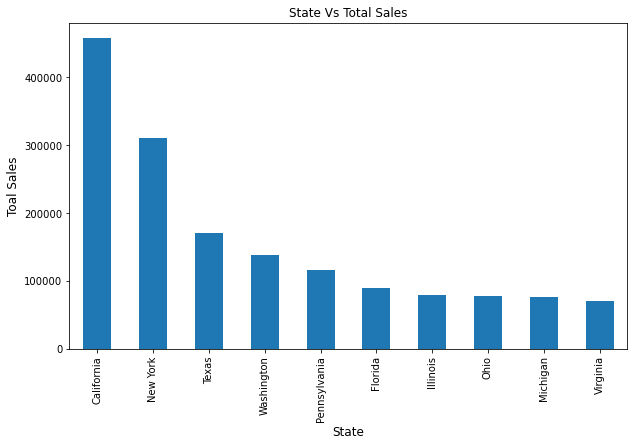

In [49]:
# plot barplot
plt.figure(figsize=(10,6))
state_sale.plot(kind='bar')
plt.title("State Vs Total Sales",fontsize=12)
plt.xlabel('State',fontsize=12)
plt.ylabel("Toal Sales",fontsize=12);

Observe: Most sales in California state.

# Which Top 10 states by Profit?

In [50]:
state_profit=df.groupby('State')['Profit'].sum().sort_values(ascending=False)[:10]
state_profit

State
California    76381.3871
New York      74038.5486
Washington    33402.6517
Michigan      24463.1876
Virginia      18597.9504
Indiana       18382.9363
Georgia       16250.0433
Kentucky      11199.6966
Minnesota     10823.1874
Delaware       9977.3748
Name: Profit, dtype: float64

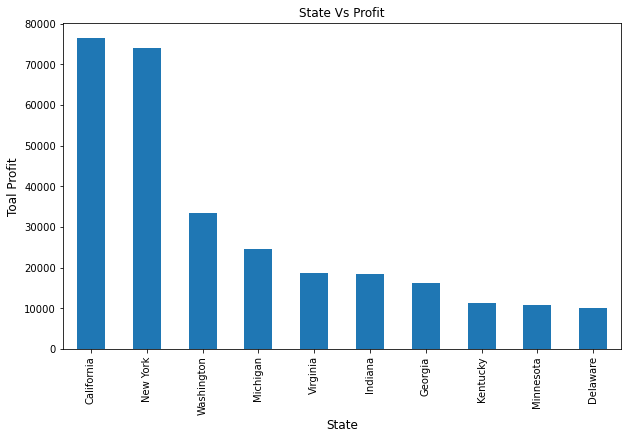

In [51]:
# plot barplot
plt.figure(figsize=(10,6))
state_profit.plot(kind='bar')
plt.title("State Vs Profit",fontsize=12)
plt.xlabel('State',fontsize=12)
plt.ylabel("Toal Profit",fontsize=12);

Observe: Most profit in California state.

# Analysis Based on Ship Mode

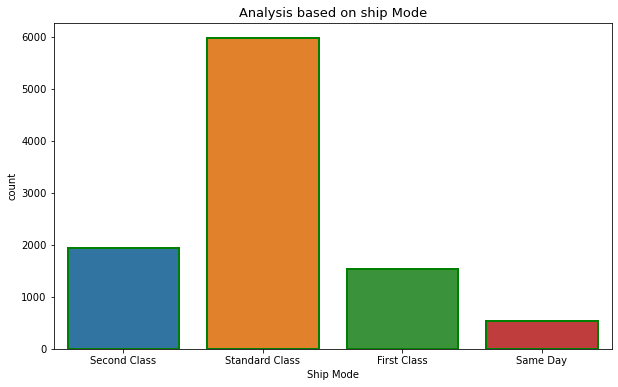

In [61]:
#plot
plt.figure(figsize=(10,6))
sns.countplot(x='Ship Mode',data=df,edgecolor='g',linewidth=2)
plt.title('Analysis based on ship Mode',fontsize=13);

In [64]:
ship_mode=df.groupby('Ship Mode')[['Sales','Profit']].mean()
ship_mode

,Sales,Profit
Ship Mode,,
First Class,228.497024,31.839948
Same Day,236.396179,29.266591
Second Class,236.089239,29.535545
Standard Class,227.583067,27.494770


In [65]:
ship_mode.sum()

Sales     928.565508
Profit    118.136854
dtype: float64

In [66]:
ship_mode['Sales%']=(ship_mode['Sales']/928.565508)*100
ship_mode['Profit%']=(ship_mode['Profit']/118.136854)*100

In [67]:
ship_mode

,Sales,Profit,Sales%,Profit%
Ship Mode,,,,
First Class,228.497024,31.839948,24.607529,26.951749
Same Day,236.396179,29.266591,25.458212,24.773464
Second Class,236.089239,29.535545,25.425157,25.001127
Standard Class,227.583067,27.494770,24.509102,23.273660


Observe: 
1. Highest ship Mode in Standard Class.
2. Lowest sales: Standard Class(24.51%)¶
3. Highest sales: Same Day(25.46%)
4. Lowest profit: Standard Class(23.28%)
5. Highest profit: First class(26.96%)

# Analysis based On segment

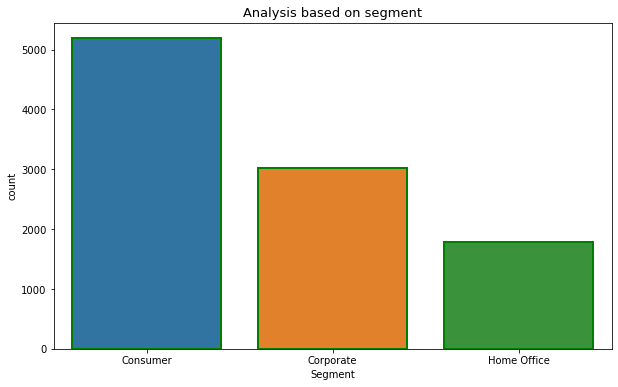

In [70]:
#plot
plt.figure(figsize=(10,6))
sns.countplot(x='Segment',data=df,edgecolor='g',linewidth=2)
plt.title('Analysis based on segment',fontsize=13);

In [72]:
segment_mode=df.groupby('Segment')[['Sales','Profit']].mean()
segment_mode

,Sales,Profit
Segment,,
Consumer,223.733644,25.836873
Corporate,233.823300,30.456667
Home Office,240.972041,33.818664


In [73]:
segment_mode.sum()

Sales     698.528985
Profit     90.112204
dtype: float64

In [74]:
segment_mode['Sales%']=(segment_mode['Sales']/698.528985)*100
segment_mode['Profit%']=(segment_mode['Profit']/90.112204)*100

In [75]:
segment_mode

,Sales,Profit,Sales%,Profit%
Segment,,,,
Consumer,223.733644,25.836873,32.029257,28.671891
Corporate,233.823300,30.456667,33.473672,33.798604
Home Office,240.972041,33.818664,34.497071,37.529505


Sales:
1. Lowest sales: Consumer(32.03%)
2. Highest sales: Home Office(34.50%)


Profit:
1. Lowest profit: Consumer(28.67%)
2. Highest profit: Home Office(37.53%)

Though there is very little differences between the classes, still, maximum and minimum can be ascertained on seeing these analysis. The corporates are on the second position for both sales an profits with Home office leading the drive in the best way for the company

# Relationship Between sales vs profit

<AxesSubplot:xlabel='Sales', ylabel='Profit'>

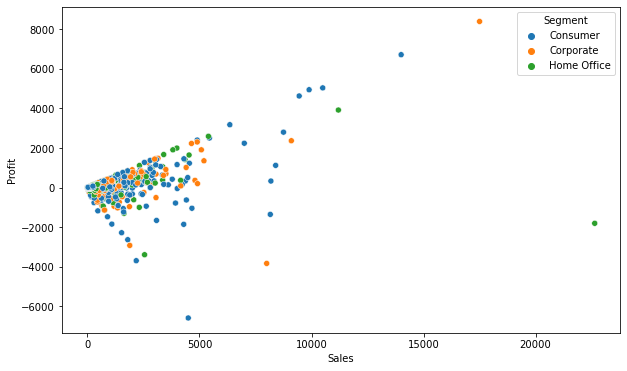

In [77]:
#plot scatter
plt.figure(figsize=(10,6))
sns.scatterplot(x='Sales',y='Profit',data=df,hue='Segment')

In [78]:
df.head(2)

,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
1,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820


# Category Wise Analysis

In [79]:
df['Category'].value_counts()

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64

In [84]:
category=df.groupby('Category')[['Sales','Profit']].sum()
category

,Sales,Profit
Category,,
Furniture,741999.7953,18451.2728
Office Supplies,719047.0320,122490.8008
Technology,836154.0330,145454.9481


<Figure size 864x432 with 0 Axes>

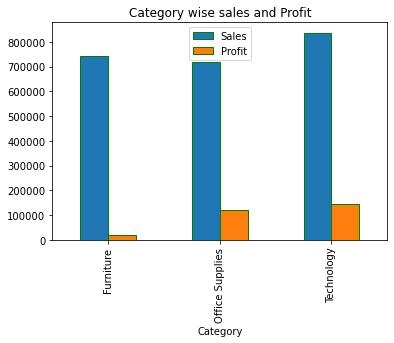

In [91]:
#plot 
plt.figure(figsize=(12,6))
category.plot(kind='bar',linewidth=1,edgecolor='g')
plt.title('Category wise sales and Profit',fontsize=12);

Observe:
1. High Sales: Technology category
2. High Profit: Technology Category
3. Low Sales:  office suppliers category
4. low profit: Furniture category

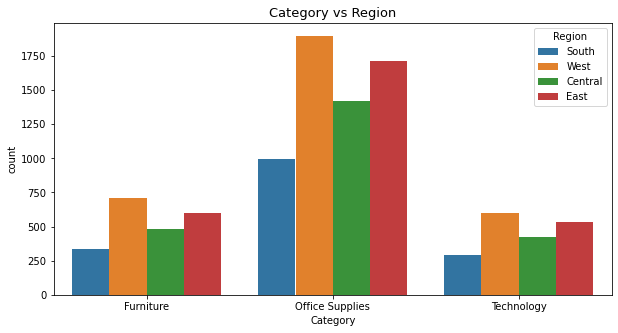

In [105]:
#category wise Region
plt.figure(figsize=(10,5))
sns.countplot(x='Category',data=df,hue='Region')
plt.title('Category vs Region',fontsize=13);

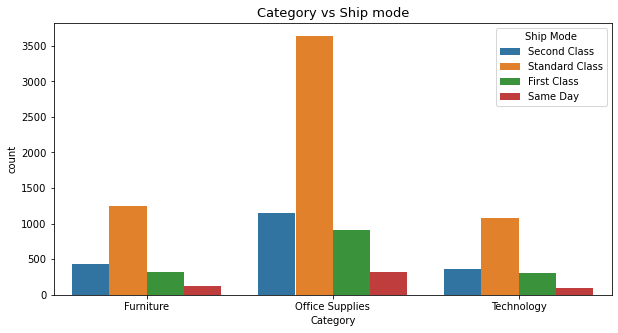

In [108]:
#category wise shipmode
plt.figure(figsize=(10,5))
sns.countplot(x='Category',data=df,hue='Ship Mode')
plt.title('Category vs Ship mode',fontsize=13);

# Subcategory Wise Analysis

In [118]:
df['Sub-Category'].value_counts()


Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
Art             796
Accessories     775
Chairs          617
Appliances      466
Labels          364
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64

In [123]:
#Top 5 Sub-category by sales and profit
top_5_sub_category=df.groupby('Sub-Category')['Sales','Profit'].sum()[:5]
top_5_sub_category

C:\Users\RAKIBH~1\AppData\Local\Temp/ipykernel_13308/310180213.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  top_5_sub_category=df.groupby('Sub-Category')['Sales','Profit'].sum()[:5]


,Sales,Profit
Sub-Category,,
Accessories,167380.3180,41936.6357
Appliances,107532.1610,18138.0054
Art,27118.7920,6527.7870
Binders,203412.7330,30221.7633
Bookcases,114879.9963,-3472.5560


<Figure size 864x360 with 0 Axes>

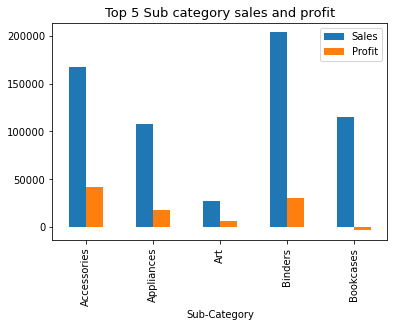

In [128]:
# plot top 5 sub category
plt.figure(figsize=(12,5))
top_5_sub_category.plot(kind='bar')
plt.title('Top 5 Sub category sales and profit',fontsize=13);

# Distribution Quantity

<Figure size 1440x720 with 0 Axes>

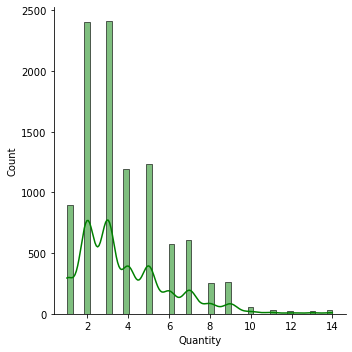

In [159]:
plt.figure(figsize=(20,10))
sns.displot(x='Quantity',data=df,kde=True,color='g');

# Top 10 Customer by Sales

In [168]:
top_10=df.groupby('Customer Name')['Sales'].sum().sort_values(ascending=False)[:10]
top_10

Customer Name
Sean Miller           25043.050
Tamara Chand          19052.218
Raymond Buch          15117.339
Tom Ashbrook          14595.620
Adrian Barton         14473.571
Ken Lonsdale          14175.229
Sanjit Chand          14142.334
Hunter Lopez          12873.298
Sanjit Engle          12209.438
Christopher Conant    12129.072
Name: Sales, dtype: float64

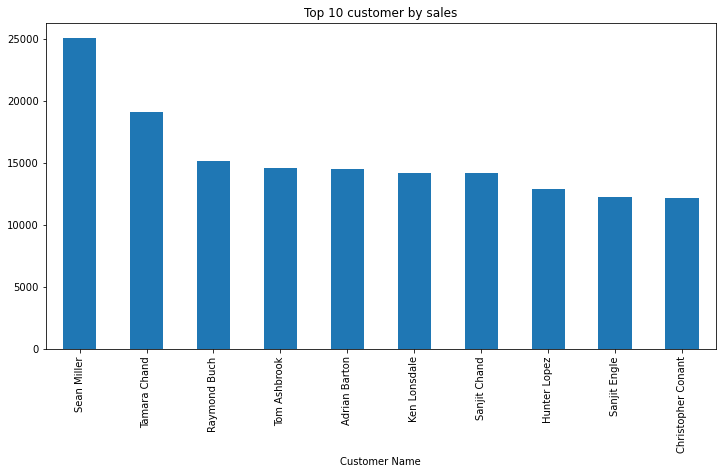

In [177]:
#plot 
plt.figure(figsize=(12,6))
top_10.plot(kind='bar')
plt.title('Top 10 customer by sales');

In [180]:
customer_count=df.groupby('Region')['Customer Name'].count()
customer_count

Region
Central    2323
East       2848
South      1620
West       3203
Name: Customer Name, dtype: int64

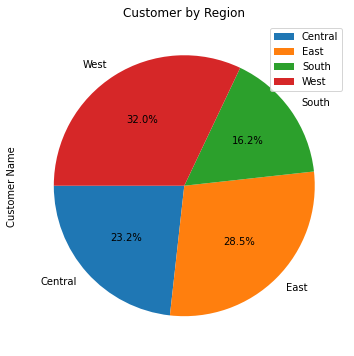

In [188]:
# pie plot
plt.figure(figsize=(12,6))
customer_count.plot(kind='pie',autopct="%1.1f%%",startangle=180)
plt.legend()
plt.title("Customer by Region");

In [202]:
df1['Month']=df1['Order Date'].str.split('/').str[0]
df1['Year']=df1['Order Date'].str.split('/').str[2]


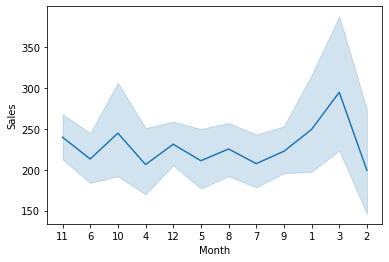

In [206]:
sns.lineplot(x=df1['Month'],y=df['Sales'],data=df1,markers=True);

In [210]:
line=df1.groupby('Month')['Sales'].sum()
line

Month
1      94924.8356
10    200322.9847
11    352461.0710
12    325293.5035
2      59751.2514
3     205005.4888
4     137762.1286
5     155028.8117
6     152718.6793
7     147238.0970
8     159044.0630
9     307649.9457
Name: Sales, dtype: float64